In [12]:
from google.colab import files
uploaded = files.upload()


Saving QVI_transaction_data.xlsx to QVI_transaction_data.xlsx


In [103]:
import pandas as pD
import seaborn as sns
import matplotlib.pyplot as plt
df1 = pd.read_csv('QVI_purchase_behaviour.csv')



In [104]:
df2=pd.read_excel('QVI_transaction_data.xlsx')
df2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [16]:
print(df1.head(5))

   LYLTY_CARD_NBR               LIFESTAGE PREMIUM_CUSTOMER
0            1000   YOUNG SINGLES/COUPLES          Premium
1            1002   YOUNG SINGLES/COUPLES       Mainstream
2            1003          YOUNG FAMILIES           Budget
3            1004   OLDER SINGLES/COUPLES       Mainstream
4            1005  MIDAGE SINGLES/COUPLES       Mainstream


checking for Nulls

In [18]:
print(df1.isnull().sum())

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


there is no nulls in the dataframe and sum aggregates all the overall and check for nulls  

getting info and describing the dataframe below


In [19]:
print(df1.info())
print(df1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None
       LYLTY_CARD_NBR
count    7.263700e+04
mean     1.361859e+05
std      8.989293e+04
min      1.000000e+03
25%      6.620200e+04
50%      1.340400e+05
75%      2.033750e+05
max      2.373711e+06


checking for unique values using unique function

In [28]:
uniqlife=df1['LIFESTAGE'].unique()
print(uniqlife)
uniqprem=df1['PREMIUM_CUSTOMER'].unique()
print(uniqprem)

['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
['Premium' 'Mainstream' 'Budget']


Counting the number of lifestages and premium customers in dataset


In [29]:
vallife=(df1['LIFESTAGE'].value_counts())
print(vallife)
valprem=(df1['PREMIUM_CUSTOMER'].value_counts())
print(valprem)

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64
PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64


Sorting values descending order of lifestages

In [35]:
sort=df1['LIFESTAGE'].sort_values(ascending=False).head()
print(sort)

0        YOUNG SINGLES/COUPLES
32985    YOUNG SINGLES/COUPLES
33028    YOUNG SINGLES/COUPLES
33026    YOUNG SINGLES/COUPLES
33010    YOUNG SINGLES/COUPLES
Name: LIFESTAGE, dtype: object


Premium customers by their life stage

In [38]:
premdf=df1.loc[df1['PREMIUM_CUSTOMER']=='Premium']
#print(premdf)
premdfbylifestage=premdf['LIFESTAGE'].value_counts().sort_index()
print(premdfbylifestage)

LIFESTAGE
MIDAGE SINGLES/COUPLES    2431
NEW FAMILIES               588
OLDER FAMILIES            2274
OLDER SINGLES/COUPLES     4750
RETIREES                  3872
YOUNG FAMILIES            2433
YOUNG SINGLES/COUPLES     2574
Name: count, dtype: int64


MainStream customers by their lifestage

In [40]:
premdfmain=df1.loc[df1['PREMIUM_CUSTOMER']=='Mainstream']
#print(premdfmain)
premdfbylifestagemain=premdfmain['LIFESTAGE'].value_counts().sort_index()
print(premdfbylifestagemain)

LIFESTAGE
MIDAGE SINGLES/COUPLES    3340
NEW FAMILIES               849
OLDER FAMILIES            2831
OLDER SINGLES/COUPLES     4930
RETIREES                  6479
YOUNG FAMILIES            2728
YOUNG SINGLES/COUPLES     8088
Name: count, dtype: int64


In [41]:
premdfbud=df1.loc[df1['PREMIUM_CUSTOMER']=='Budget']
#print(premdfbud)
premdfbylifestagebud=premdfbud['LIFESTAGE'].value_counts().sort_index()
print(premdfbylifestagebud)

LIFESTAGE
MIDAGE SINGLES/COUPLES    1504
NEW FAMILIES              1112
OLDER FAMILIES            4675
OLDER SINGLES/COUPLES     4929
RETIREES                  4454
YOUNG FAMILIES            4017
YOUNG SINGLES/COUPLES     3779
Name: count, dtype: int64


 Combined segmentation group by lifestage,premium customer and lylty card counting number and renameing the card no to customer count

In [44]:

segment_counts = df1.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].count().reset_index()
segment_counts = segment_counts.rename(columns={'LYLTY_CARD_NBR': 'Customer_Count'})
print(segment_counts)

                 LIFESTAGE PREMIUM_CUSTOMER  Customer_Count
0   MIDAGE SINGLES/COUPLES           Budget            1504
1   MIDAGE SINGLES/COUPLES       Mainstream            3340
2   MIDAGE SINGLES/COUPLES          Premium            2431
3             NEW FAMILIES           Budget            1112
4             NEW FAMILIES       Mainstream             849
5             NEW FAMILIES          Premium             588
6           OLDER FAMILIES           Budget            4675
7           OLDER FAMILIES       Mainstream            2831
8           OLDER FAMILIES          Premium            2274
9    OLDER SINGLES/COUPLES           Budget            4929
10   OLDER SINGLES/COUPLES       Mainstream            4930
11   OLDER SINGLES/COUPLES          Premium            4750
12                RETIREES           Budget            4454
13                RETIREES       Mainstream            6479
14                RETIREES          Premium            3872
15          YOUNG FAMILIES           Bud

In [45]:
merged_df = df2.merge(df1, on='LYLTY_CARD_NBR', how='left')


In [46]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [47]:
print(merged_df.isnull().sum())

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [52]:
merged_df=merged_df.dropna(subset=['LIFESTAGE','PREMIUM_CUSTOMER'])


In [53]:
merged_df['DATE']=pd.to_datetime(merged_df['DATE'])

In [58]:
merged_df['BRAND']=merged_df['PROD_NAME'].str.split().str[0].tail()
#print(merged_df)

product name and their quantity and their total sales

In [61]:
prodqty_sales=merged_df.groupby('PROD_NAME')[['PROD_QTY','TOT_SALES']].sum().head(50).reset_index()
print(prodqty_sales)

                                  PROD_NAME  PROD_QTY  TOT_SALES
0                         Burger Rings 220g      2970     6831.0
1                  CCs Nacho Cheese    175g      2839     5961.9
2                         CCs Original 175g      2880     6048.0
3                  CCs Tasty Cheese    175g      2890     6069.0
4            Cheetos Chs & Bacon Balls 190g      2801     9243.3
..                                      ...       ...        ...
109  WW Sour Cream &OnionStacked Chips 160g      2802     5323.8
110     WW Supreme Cheese   Corn Chips 200g      2837     5390.3
111          Woolworths Cheese   Rings 190g      2872     5169.6
112          Woolworths Medium   Salsa 300g      2700     4050.0
113          Woolworths Mild     Salsa 300g      2823     4234.5

[114 rows x 3 columns]


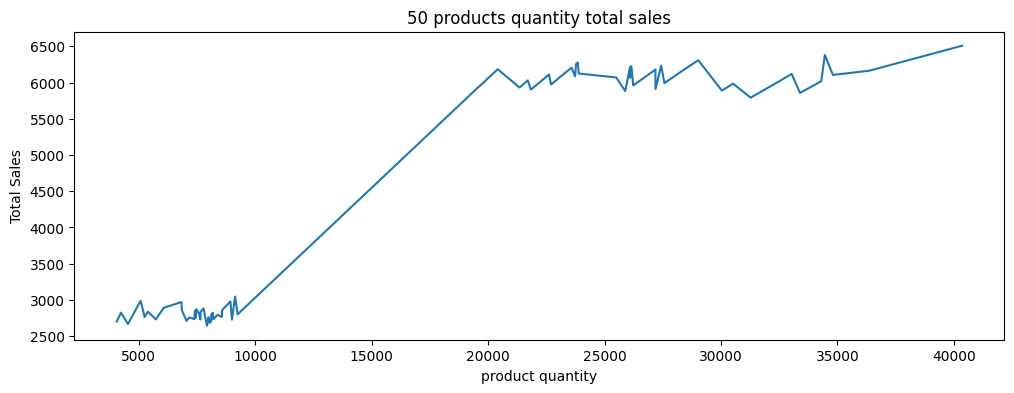

In [139]:
plt.figure(figsize=(12,4))
sns.lineplot(data=prodqty_sales,y='PROD_QTY',x='TOT_SALES')
plt.title('50 products quantity total sales')
plt.xlabel('product quantity')
plt.ylabel('Total Sales')
plt.show()

In [64]:
print(merged_df.columns)


Index(['PROD_NAME', 'PROD_QTY', 'TOT_SALES'], dtype='object')


In [66]:
prodsort=df2.groupby('PROD_NAME')['TXN_ID'].sum().sort_values().head(15)
print(prodsort)

PROD_NAME
French Fries Potato Chips 175g              189167688
Thins Chips         Originl saltd 175g      191872222
Red Rock Deli Chikn&Garlic Aioli 150g       192080863
WW Crinkle Cut      Original 175g           193112357
Smith Crinkle Cut   Bolognese 150g          193554596
Smiths Crinkle Cut  French OnionDip 150g    193596201
Smiths Chip Thinly  CutSalt/Vinegr175g      193883948
Cheetos Chs & Bacon Balls 190g              193979011
Cheezels Cheese Box 125g                    194289762
Natural Chip        Compny SeaSalt175g      194998541
RRD Pc Sea Salt     165g                    195059887
Smiths Crinkle Cut  Tomato Salsa 150g       195337276
RRD Lime & Pepper   165g                    195490123
NCC Sour Cream &    Garden Chives 175g      195735700
Woolworths Medium   Salsa 300g              196271270
Name: TXN_ID, dtype: int64


In [68]:
merged_data = df2.merge(df1, on='LYLTY_CARD_NBR', how='left')

In [69]:
spentAmnt=merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

In [70]:
print(spentAmnt)

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   35514.80
1   MIDAGE SINGLES/COUPLES       Mainstream   90803.85
2   MIDAGE SINGLES/COUPLES          Premium   58432.65
3             NEW FAMILIES           Budget   21928.45
4             NEW FAMILIES       Mainstream   17013.90
5             NEW FAMILIES          Premium   11491.10
6           OLDER FAMILIES           Budget  168363.25
7           OLDER FAMILIES       Mainstream  103445.55
8           OLDER FAMILIES          Premium   81958.40
9    OLDER SINGLES/COUPLES           Budget  136769.80
10   OLDER SINGLES/COUPLES       Mainstream  133393.80
11   OLDER SINGLES/COUPLES          Premium  132263.15
12                RETIREES           Budget  113147.80
13                RETIREES       Mainstream  155677.05
14                RETIREES          Premium   97646.05
15          YOUNG FAMILIES           Budget  139345.85
16          YOUNG FAMILIES       Mainstream   92788.75
17        

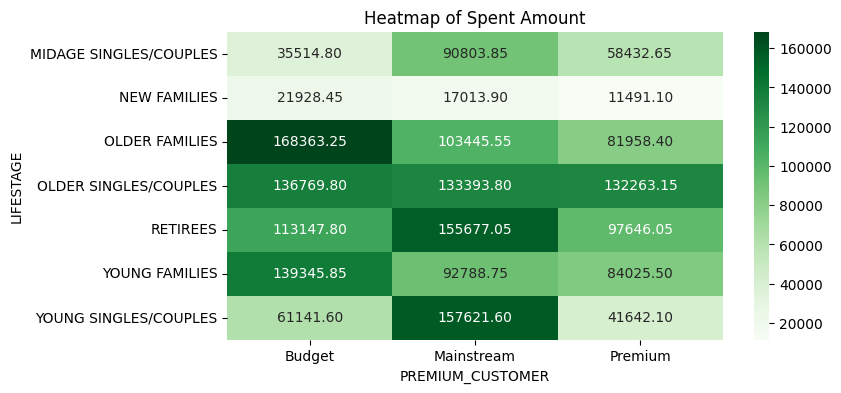

In [135]:
pivot=spentAmnt.pivot(index='LIFESTAGE',columns='PREMIUM_CUSTOMER',values='TOT_SALES')
plt.figure(figsize=(8,4))
sns.heatmap(pivot,annot=True,fmt=".2f",cmap='Greens')
plt.title('Heatmap of Spent Amount')
plt.show()

In [73]:
Trans_count=merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TXN_ID'].nunique().reset_index()
print(Trans_count)

                 LIFESTAGE PREMIUM_CUSTOMER  TXN_ID
0   MIDAGE SINGLES/COUPLES           Budget    4988
1   MIDAGE SINGLES/COUPLES       Mainstream   11801
2   MIDAGE SINGLES/COUPLES          Premium    8160
3             NEW FAMILIES           Budget    2991
4             NEW FAMILIES       Mainstream    2321
5             NEW FAMILIES          Premium    1584
6           OLDER FAMILIES           Budget   22935
7           OLDER FAMILIES       Mainstream   14113
8           OLDER FAMILIES          Premium   11078
9    OLDER SINGLES/COUPLES           Budget   18301
10   OLDER SINGLES/COUPLES       Mainstream   18194
11   OLDER SINGLES/COUPLES          Premium   17654
12                RETIREES           Budget   15113
13                RETIREES       Mainstream   21363
14                RETIREES          Premium   13036
15          YOUNG FAMILIES           Budget   18970
16          YOUNG FAMILIES       Mainstream   12808
17          YOUNG FAMILIES          Premium   11464
18   YOUNG S

In [75]:
avgamntontransaction=merged_data.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].mean().reset_index()
print(avgamntontransaction)

                 LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
0   MIDAGE SINGLES/COUPLES           Budget   7.074661
1   MIDAGE SINGLES/COUPLES       Mainstream   7.647284
2   MIDAGE SINGLES/COUPLES          Premium   7.112056
3             NEW FAMILIES           Budget   7.297321
4             NEW FAMILIES       Mainstream   7.317806
5             NEW FAMILIES          Premium   7.231655
6           OLDER FAMILIES           Budget   7.269570
7           OLDER FAMILIES       Mainstream   7.262395
8           OLDER FAMILIES          Premium   7.322945
9    OLDER SINGLES/COUPLES           Budget   7.430315
10   OLDER SINGLES/COUPLES       Mainstream   7.282116
11   OLDER SINGLES/COUPLES          Premium   7.449766
12                RETIREES           Budget   7.443445
13                RETIREES       Mainstream   7.252262
14                RETIREES          Premium   7.456174
15          YOUNG FAMILIES           Budget   7.287201
16          YOUNG FAMILIES       Mainstream   7.189025
17        

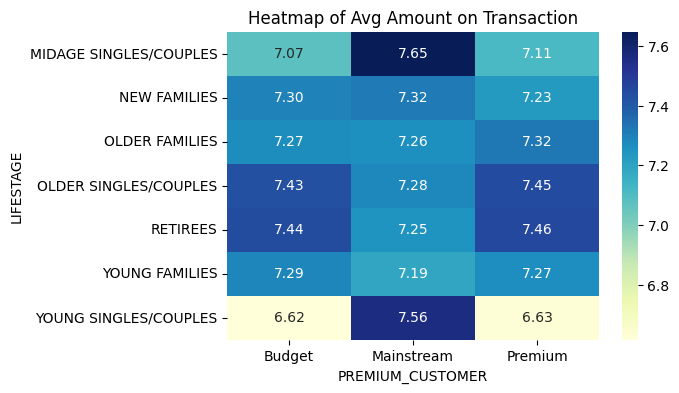

In [133]:
pivot = avgamntontransaction.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES')

plt.figure(figsize=(6,4))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap of Avg Amount on Transaction')
plt.show()


In [78]:
merged_data['unitprice']=merged_data['TOT_SALES']/merged_data['PROD_QTY']
avgprice=merged_data.groupby(['BRAND','PROD_QTY'])['unitprice'].mean().reset_index()
print(avgprice)

                          PROD_NAME  PROD_QTY  unitprice
0                 Burger Rings 220g         1        2.3
1                 Burger Rings 220g         2        2.3
2                 Burger Rings 220g         3        2.3
3                 Burger Rings 220g         4        2.3
4                 Burger Rings 220g         5        2.3
..                              ...       ...        ...
549  Woolworths Medium   Salsa 300g         5        1.5
550  Woolworths Mild     Salsa 300g         1        1.5
551  Woolworths Mild     Salsa 300g         2        1.5
552  Woolworths Mild     Salsa 300g         3        1.5
553  Woolworths Mild     Salsa 300g         5        1.5

[554 rows x 3 columns]


EDA analysis

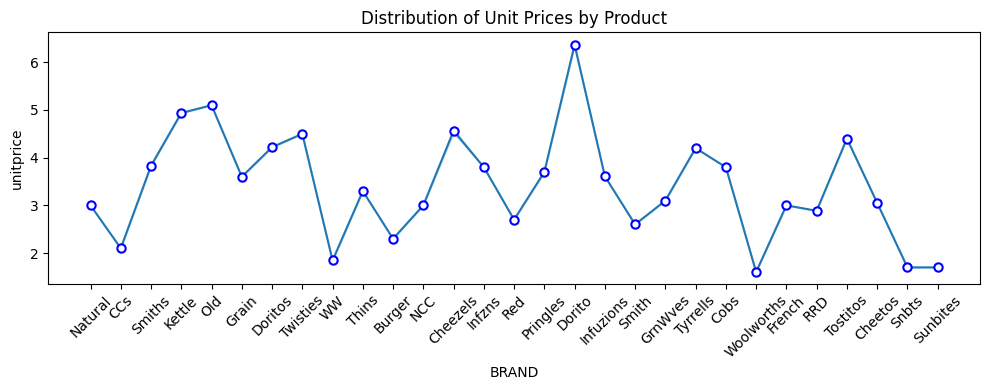

In [130]:
plt.figure(figsize=(10,4))
sns.lineplot(data=merged_data,x='BRAND',y='unitprice',marker='o',markeredgecolor='blue',markerfacecolor='white',markeredgewidth=1.5)
plt.title('Distribution of Unit Prices by Product')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [86]:
merged_data['BRAND']=merged_data['PROD_NAME'].str.split().str[0]
print(merged_data)

         DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  \
0         Natural Chip        Compny SeaSalt175g         2        6.0   
1                       CCs Nacho Cheese    175g         3        6.3   
2         Smiths Crinkle Cut  Chips 

In [91]:
top_brands=merged_data.groupby('BRAND')['TOT_SALES'].sum().sort_values(ascending=False).reset_index()
print(top_brands)

         BRAND  TOT_SALES
0       Kettle   390239.8
1       Smiths   210076.8
2      Doritos   201538.9
3     Pringles   177655.5
4          Old    90785.1
5        Thins    88852.5
6     Twisties    81522.1
7     Tostitos    79789.6
8    Infuzions    76247.6
9         Cobs    70569.8
10         RRD    64954.5
11    Tyrrells    51647.4
12       Grain    43048.8
13      Dorito    40352.0
14    Cheezels    40029.9
15          WW    35889.5
16     Natural    34272.0
17         Red    30091.5
18      Infzns    22800.0
19         CCs    18078.9
20     Cheetos    16884.5
21       Smith    14583.4
22  Woolworths    13454.1
23     GrnWves     8568.4
24         NCC     8046.0
25      French     7929.0
26      Burger     6831.0
27       Snbts     5076.2
28    Sunbites     4600.2


Text(0, 0.5, 'Total Sales')

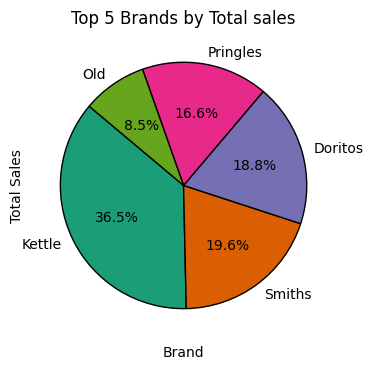

In [124]:
top5=top_brands.head()
plt.figure(figsize=(4,4))
plt.pie(top5['TOT_SALES'], labels=top5['BRAND'],autopct='%1.1f%%', startangle=140,colors=plt.cm.Dark2.colors,wedgeprops={'edgecolor': 'black'})
plt.title('Top 5 Brands by Total sales')
plt.xlabel('Brand')
plt.ylabel('Total Sales')

In [96]:
StoreCount=merged_data['STORE_NBR'].value_counts().sort_values().reset_index().tail()
print(StoreCount)

     STORE_NBR  count
267        237   1785
268        165   1819
269         93   1832
270         88   1873
271        226   2022


<ipython-input-118-f0207e520a74>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=StoreCount,x='STORE_NBR',y='count',palette="deep")


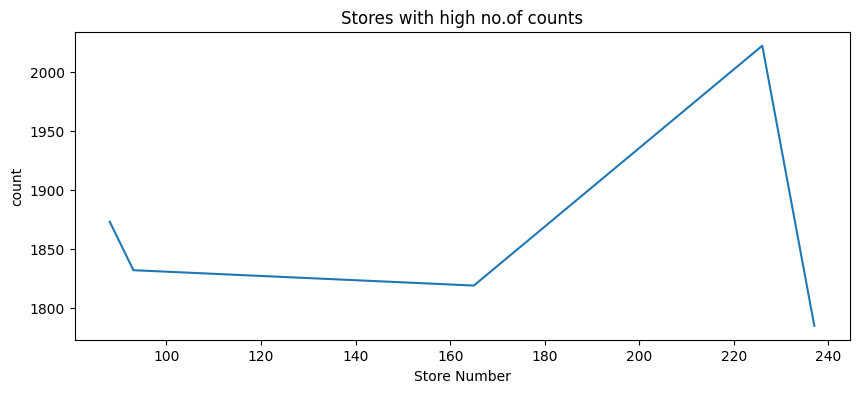

In [118]:
plt.figure(figsize=(10,4))
sns.lineplot(data=StoreCount,x='STORE_NBR',y='count',palette="deep")
plt.title('Stores with high no.of counts')
plt.xlabel('Store Number')
plt.ylabel('count')
plt.show()

In [115]:
topstores = merged_data.groupby(['STORE_NBR','PROD_NAME'])['TOT_SALES'].sum().reset_index()
topstores = topstores.sort_values('TOT_SALES', ascending=False).head(13)
print(topstores)


       STORE_NBR                                 PROD_NAME  TOT_SALES
19141        226          Dorito Corn Chp     Supreme 380g    1803.75
3331          40  Old El Paso Salsa   Dip Tomato Mild 300g     499.80
19181        226  Smiths Crinkle Chips Salt & Vinegar 330g     495.90
17293        203          Kettle Honey Soy    Chicken 175g     491.40
14130        165          Dorito Corn Chp     Supreme 380g     490.75
20166        238          Dorito Corn Chp     Supreme 380g     487.50
19182        226    Smiths Crnkle Chip  Orgnl Big Bag 380g     472.00
17840        210          Dorito Corn Chp     Supreme 380g     471.25
14126        165                      Cheezels Cheese 330g     461.70
18356        217          Doritos Cheese      Supreme 330g     456.00
17049        199          Dorito Corn Chp     Supreme 380g     448.50
20149        237    Smiths Crnkle Chip  Orgnl Big Bag 380g     448.40
5023          58    Smiths Crnkle Chip  Orgnl Big Bag 380g     448.40


<ipython-input-116-eaf29d307f82>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=topstores,x='STORE_NBR',y='TOT_SALES',palette='rocket')


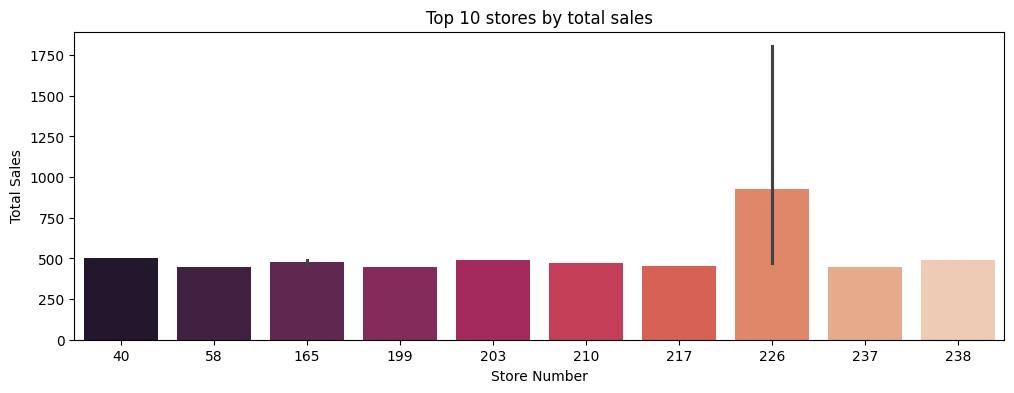

In [116]:
plt.figure(figsize=(12,4))
sns.barplot(data=topstores,x='STORE_NBR',y='TOT_SALES',palette='rocket')
plt.title('Top 10 stores by total sales')
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.show()